<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/Human_Project_Deep_Learning_CNN_Algorithm_e_h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human-Detection Classification Project




   This project is about deep learning Convolutional Neural Networks (CNN) algorithm.CNN, a class of artificial neural networks that has become dominant in various computer vision tasks, is attracting interest across a variety of domains, including radiology. CNN is designed to automatically and adaptively learn spatial hierarchies of features through backpropagation by using multiple building blocks, such as convolution layers, pooling layers, and fully connected layers. 

  This review study offers a perspective on the basic concepts of CNN and its application to various Human detector task, and discusses its challenges and future directions in the field of image classification. 

# Dataset Info

The Human dataset is a common computer vision dataset in which pictures are classified as either including human or place.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect human versus place using CNN.

Train set includes 362 places-559 human images. 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

After loading the libraries we will use, we will load our data. Since we will work on the CNN algorithm beforehand, we run the code below for our compiler to work over the GPU. We can also edit this from the runtime part of our compiler.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Data/Human.zip", "r")
zip_ref.extractall()
zip_ref.close()

Since our data is in a compressed format, we first extract our data from the file with the ".zip" extension.

# Recognizing and Understanding Data

In [ ]:
my_data_dir =("/content/human detection dataset")

In [ ]:
os.listdir(my_data_dir) 

['1', '0']

While creating the algorithm, we divide our data into three parts. We will train algorithms with training data from these. Then we will test our algorithm with the val_da data. Finally, we will give our best working algorithm our test data to predict.

In [ ]:
human_path = my_data_dir + '/1/'
place_path = my_data_dir + '/0'


In [ ]:
folder_name = '/content/human detection dataset/1'

for i in os.listdir(folder_name):
    os.rename(folder_name+'/'+i, folder_name+'/'+"human"+i)

In [ ]:
os.listdir("/content/human detection dataset/1")[:5]

['human212.png', 'human457.png', 'human546.png', 'human439.png', 'human4.png']

In [ ]:
folder_name = '/content/human detection dataset/0'

for i in os.listdir(folder_name):
    os.rename(folder_name+'/'+i, folder_name+'/'+"no_human"+i)

In [ ]:
os.listdir(place_path)[:5]

['no_human2.png',
 'no_human286.png',
 'no_human23.png',
 'no_human189.png',
 'no_human107.png']

In [ ]:
from os import listdir
from os.path import isfile, join


onlyfiles = [f for f in listdir(human_path) if isfile(join(human_path, f))]

In [ ]:
from os import listdir
from os.path import isfile, join
place = "/content/human detection dataset/0"
human = "/content/human detection dataset/1"
onlyfiles = [f for f in listdir(human) if isfile(join(place, f))]

- Split folders with files (e.g. images) into train, validation and test (dataset) folders.

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#% pip install split-folders
import splitfolders 
#import splitfolders
input_folder = "/content/human detection dataset"
output = "/content/human detection dataset"
 #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) 
# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example

Copying files: 921 files [00:00, 1869.94 files/s]


_ Data set is divided to 3 paths (train_path, val_path, test_path).

In [ ]:
train_path= "/content/human detection dataset/train/"
val_path = "/content/human detection dataset/val/"
test_path = "/content/human detection dataset/test/"

- We have 2 classes 0 and 1. 1 means human , 0 means places. 

In [ ]:
classes = os.listdir(train_path)
classes

['1', '0']

- Pathlib converts to images to python paths. 
- It clasify them. 

In [ ]:
import pathlib

data_dir = pathlib.Path(train_path) 
# turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
# created a list of class_names from the subdirectories
print(class_names) 

['0' '1']


In [ ]:
class_names

array(['0', '1'], dtype='<U1')

- Os is  documantary management system of python.

In [ ]:
os.listdir(train_path)

['1', '0']

# Data Preprocessing

We list the places images in our data by labeling them.

In [ ]:
os.listdir(train_path+'0')[:11]

['no_human286.png',
 'no_human23.png',
 'no_human189.png',
 'no_human107.png',
 'no_human148.png',
 'no_human241.png',
 'no_human318.png',
 'no_human355.png',
 'no_human165.png',
 'no_human178.png',
 'no_human126.png']

In [ ]:
os.listdir(train_path+'1')[:11]

['human457.png',
 'human546.png',
 'human439.png',
 'human4.png',
 'human416.png',
 'human375.png',
 'human292.png',
 'human472.png',
 'human467.png',
 'human214.png',
 'human29.png']

- We see the shape of our datas.

In [ ]:
len(os.listdir(train_path+'/0')), len(os.listdir(train_path+'/1'))

(289, 447)

In [ ]:
len(os.listdir(val_path+'/0')), len(os.listdir(val_path+'/1'))

(36, 55)

In [ ]:
len(os.listdir(test_path+'/0')), len(os.listdir(test_path+'/1'))

(37, 57)

- We take an example images from both train-places and train-human folders to observe process.

In [ ]:
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in '/content/human detection dataset'.
There are 0 directories and 559 images in '/content/human detection dataset/1'.
There are 2 directories and 0 images in '/content/human detection dataset/val'.
There are 0 directories and 55 images in '/content/human detection dataset/val/1'.
There are 0 directories and 36 images in '/content/human detection dataset/val/0'.
There are 2 directories and 0 images in '/content/human detection dataset/train'.
There are 0 directories and 447 images in '/content/human detection dataset/train/1'.
There are 0 directories and 289 images in '/content/human detection dataset/train/0'.
There are 0 directories and 362 images in '/content/human detection dataset/0'.
There are 2 directories and 0 images in '/content/human detection dataset/test'.
There are 0 directories and 57 images in '/content/human detection dataset/test/1'.
There are 0 directories and 37 images in '/content/human detection dataset/test/0'.


In [ ]:
para_cell_pathc = train_path+'0/'+'/no_human264.png'

In [ ]:
para_cell_pathc

'/content/human detection dataset/train/0//no_human264.png'

In [ ]:
places=imread(para_cell_pathc)

In [ ]:
para_cell= imread(para_cell_pathc)

In [ ]:
os.listdir(train_path+'0')[5]

'no_human241.png'

In [ ]:
para_cell_pathd = train_path+'1/'+'/human525.png'

In [ ]:
para_cell_pathd

'/content/human detection dataset/train/1//human525.png'

In [ ]:
humans=imread(para_cell_pathd)

In [ ]:
para_cell.shape

(369, 460, 3)

In [ ]:
humans.shape

(495, 566, 3)

In [ ]:
places.shape

(369, 460, 3)

- We decide on the final dimension of these images.

In [ ]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

- Some random examples images on the below. According to classes.

Image shape: (256, 256, 3)


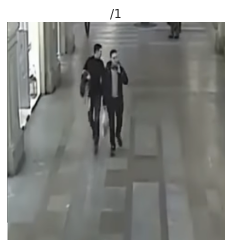

In [ ]:
img = view_random_image(target_dir=train_path,
                        target_class="/1")

Image shape: (540, 654, 3)


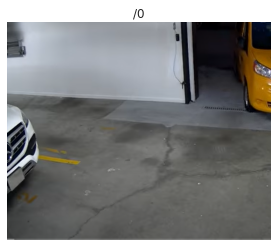

In [ ]:
img = view_random_image(target_dir=train_path,
                        target_class="/0")

- 

- On the below , we see random images but all data set.

Image shape: (256, 256, 3)


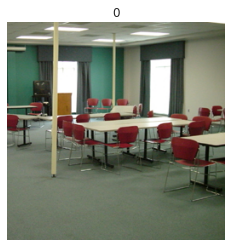

In [ ]:
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names))

- Imread convert images to arrays.

In [ ]:
#imread((train_path+"1/"+image),0)

In [ ]:
x = [imread((train_path+"1/"+image),0).shape[0] for image in os.listdir(train_path+'/1')]

- The code below we got invalid PNG header mistake , to solve this problem we used this code "((train_path+"1/"+image),0)".

In [ ]:
x = [imread((train_path+"1/"+image),0).shape[0] for image in os.listdir(train_path+'/1')]
y = [imread((train_path+"1/"+image),0).shape[1] for image in os.listdir(train_path+'/1')]

In [ ]:
x[:5]

[256, 310, 256, 360, 256]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


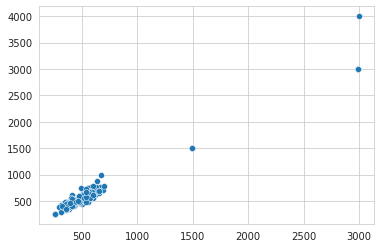

In [ ]:
sns.scatterplot(x,y);

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [ ]:
np.mean(x), np.median(x)

(612.3400447427293, 328.0)

In [ ]:
np.mean(y), np.median(y)

(639.8210290827741, 346.0)

In [ ]:
image_shape = (128,128,3) # burayi bir aciklama ekle

In [ ]:
humans.max()

1.0

In [ ]:
places.max()

1.0

In [ ]:
para_cell.max()

1.0

In [ ]:
# buraya aciklama ekliyebilirsin

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

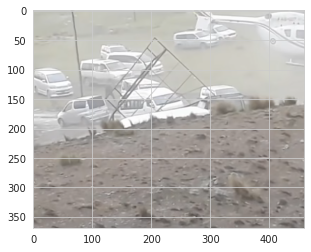

In [ ]:
plt.imshow(para_cell);

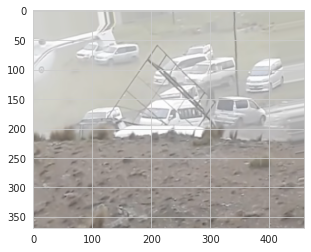

In [ ]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

val+test kullanilacak burda

In [ ]:
image_gen.flow_from_directory(test_path)

Found 94 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(val_path)

Found 91 images belonging to 2 classes.


In [ ]:
batch_size = 32

In [ ]:
val_image_gen = image_gen.flow_from_directory(directory=val_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 91 images belonging to 2 classes.


In [ ]:
for i in val_image_gen:
  print(i)
  break

(array([[[[0.2441649 , 0.32711923, 0.2860994 ],
         [0.29264915, 0.3750021 , 0.34620357],
         [0.12396076, 0.20953737, 0.1788627 ],
         ...,
         [0.71501446, 0.7660771 , 0.62816405],
         [0.5974832 , 0.65221876, 0.48492292],
         [0.925265  , 0.962635  , 0.7659563 ]],

        [[0.2323326 , 0.31633094, 0.27217907],
         [0.288473  , 0.37082598, 0.34098345],
         [0.14275323, 0.22798185, 0.1976552 ],
         ...,
         [0.7314655 , 0.7816487 , 0.6374846 ],
         [0.6086195 , 0.663007  , 0.49849525],
         [0.89220417, 0.93131423, 0.7374196 ]],

        [[0.2205003 , 0.30554268, 0.2582587 ],
         [0.28429693, 0.36664987, 0.3357633 ],
         [0.16154571, 0.24642631, 0.21644767],
         ...,
         [0.74956197, 0.7987011 , 0.64548874],
         [0.6197558 , 0.67379534, 0.51206756],
         [0.8591434 , 0.8999934 , 0.70888287]],

        ...,

        [[0.2561206 , 0.29925784, 0.29762247],
         [0.2426481 , 0.28578535, 0.28508988

In [ ]:
# y_test2= pd.Series(val_image_gen.classes).map({0:1,1:0}) egerki blabel yanlis atanmis olsaydi bole yapacaktik

In [ ]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 736 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(directory=test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 94 images belonging to 2 classes.


In [ ]:
test_image_gen.class_indices

{'0': 0, '1': 1}

# Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(42)
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model iyi sonuc vermedi ise data iyi ise model iyi sonuc verir. en fazla 10 puaab arttirir. asagi yukari yakin degerler cikar. ml de svm de cok artiyordu. dl de falan degisiklik cok yok. senin notlarda yazdiklarini ekle buraya.her bir layer benim train setimin daha iyi pgrenmesini sagliyor.

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)

In this model, we stop learning the early_stop if our result does not improve in two epoch.

We ensure that it gets the best result with the restore_best_weights parameter.

In [ ]:
model1.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

Epoch 1/10
23/23 [==============================] - 25s 542ms/step - loss: 0.6818 - accuracy: 0.5992 - val_loss: 0.6748 - val_accuracy: 0.6044
Epoch 2/10
23/23 [==============================] - 12s 546ms/step - loss: 0.6722 - accuracy: 0.6073 - val_loss: 0.6571 - val_accuracy: 0.6044
Epoch 3/10
23/23 [==============================] - 13s 546ms/step - loss: 0.6676 - accuracy: 0.6073 - val_loss: 0.6577 - val_accuracy: 0.6044


In [ ]:
model1.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model1.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.682,0.599,0.675,0.604
1,0.672,0.607,0.657,0.604
2,0.668,0.607,0.658,0.604


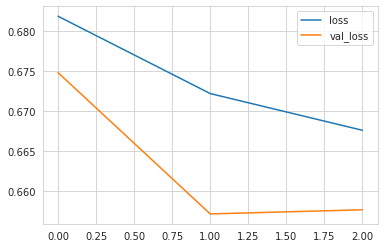

In [ ]:
summary[["loss", "val_loss"]].plot();

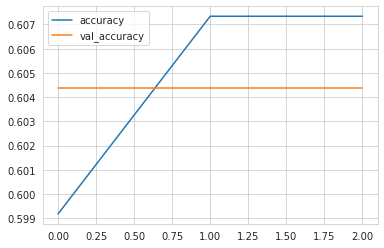

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 1s 316ms/step - loss: 0.6756 - accuracy: 0.6044
Test loss: 0.6755710244178772
Test accuracy: 0.6043956279754639


In [ ]:
pred_prob = model1.predict(val_image_gen)

In [ ]:
pred_prob

array([[0.5442185 ],
       [0.54801893],
       [0.5361015 ],
       [0.53124535],
       [0.54305786],
       [0.5433467 ],
       [0.5460644 ],
       [0.5269598 ],
       [0.54065645],
       [0.54599696],
       [0.54219   ],
       [0.53422207],
       [0.54031086],
       [0.55211264],
       [0.54454136],
       [0.5362841 ],
       [0.54941493],
       [0.5420913 ],
       [0.5402124 ],
       [0.5481815 ],
       [0.5448802 ],
       [0.53950447],
       [0.53414845],
       [0.5399458 ],
       [0.52845675],
       [0.5416816 ],
       [0.54631233],
       [0.54011136],
       [0.5211823 ],
       [0.54880154],
       [0.531774  ],
       [0.5519566 ],
       [0.54688114],
       [0.53341055],
       [0.54493606],
       [0.549814  ],
       [0.54052365],
       [0.5345927 ],
       [0.535886  ],
       [0.5321016 ],
       [0.5328109 ],
       [0.529546  ],
       [0.52918625],
       [0.5386497 ],
       [0.5477124 ],
       [0.5455614 ],
       [0.5480673 ],
       [0.545

In [ ]:
y_pred = pred_prob > 0.5

In [ ]:
y_pred


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
y_test = val_image_gen.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.60      1.00      0.75        55

    accuracy                           0.60        91
   macro avg       0.30      0.50      0.38        91
weighted avg       0.37      0.60      0.46        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 0, 36],
       [ 0, 55]])

#Model2

In [ ]:

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

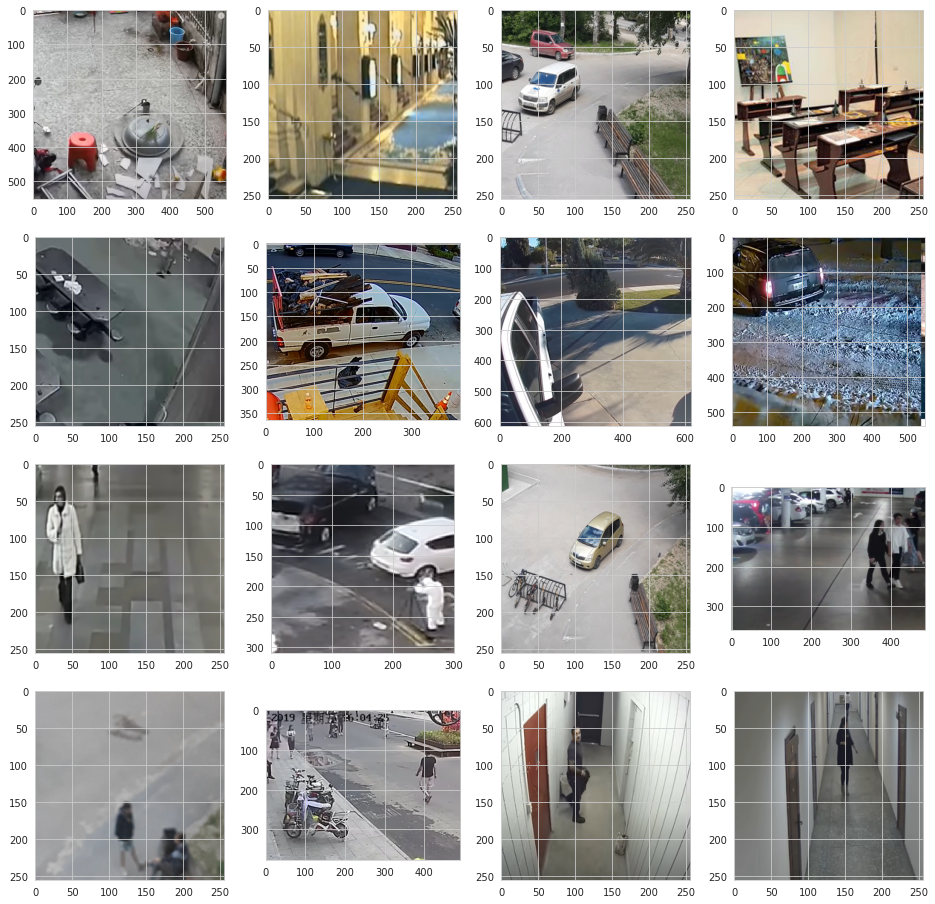

In [ ]:
try:
    # Set up matplotlib fig, and size it to fit 4x4 pics
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    pic_index += 8

    next_cat_pix = [os.path.join(place_path, fname) for fname in os.listdir('/content/human detection dataset/train/0')[pic_index - 8:pic_index]]
    next_dog_pix = [os.path.join(human_path, fname) for fname in os.listdir('/content/human detection dataset/train/1')[pic_index - 8:pic_index]]

    for i, img_path in enumerate(next_cat_pix + next_dog_pix):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('On')  # Don't show axes (or gridlines)
        img = mpimg.imread(img_path)
        plt.imshow(img)

    plt.show()

except:
    pass

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot(data_generator, images):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    #Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18, 18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('on')
    show()

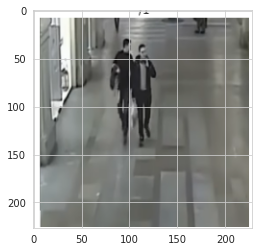

In [ ]:
images=imread("/content/image_2022-07-26_035605986.png")
imshow(images)
images = images.reshape(1,227,228,3)
imshow(images[0])

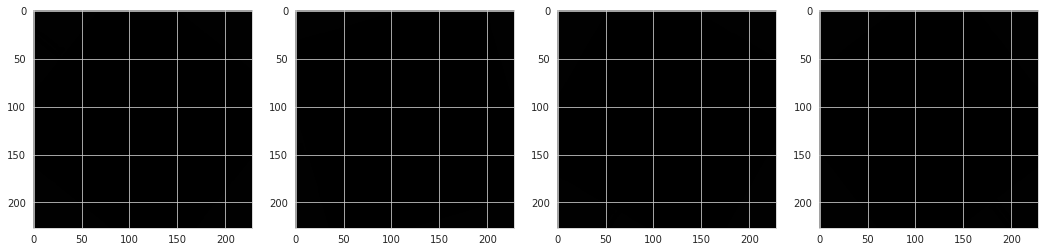

In [ ]:
plot(data_generator = ImageDataGenerator(rotation_range=180), images=images)

In [ ]:
def imageAugmentor(images):
    data_generator = ImageDataGenerator(rotation_range=180)
    plot(data_generator,images)

    data_generator = ImageDataGenerator(featurewise_center=False,
                                        width_shift_range=0.65)
    plot(data_generator,images)

    data_generator = ImageDataGenerator(featurewise_center=False,
                                        width_shift_range=0.65)
    plot(data_generator,images)

    data_generator = ImageDataGenerator(vertical_flip=True,
                                        zoom_range=[0.2, 0.9],
                                        width_shift_range=0.2)
    plot(data_generator,images)

    data_generator = ImageDataGenerator(horizontal_flip=True,
                                        zoom_range=[1, 1.5],
                                        width_shift_range=0.2)
    plot(data_generator,images)

    data_generator = ImageDataGenerator(width_shift_range=[0.1, 0.5])
    plot(data_generator,images)

    data_generator = ImageDataGenerator(zoom_range=[1, 2], rotation_range=260)
    plot(data_generator,images)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show

In [ ]:
pic_index = 0

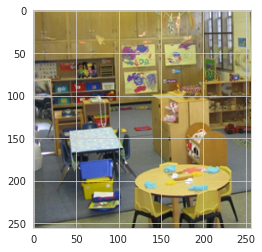

In [ ]:
pic_index += 8
next_pic = [
    os.path.join(place, fname) for fname in os.listdir("/content/human detection dataset/0")[pic_index - 8:pic_index]
]
image = plt.imread(next_pic[0])
# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
imshow(images[0])
show()

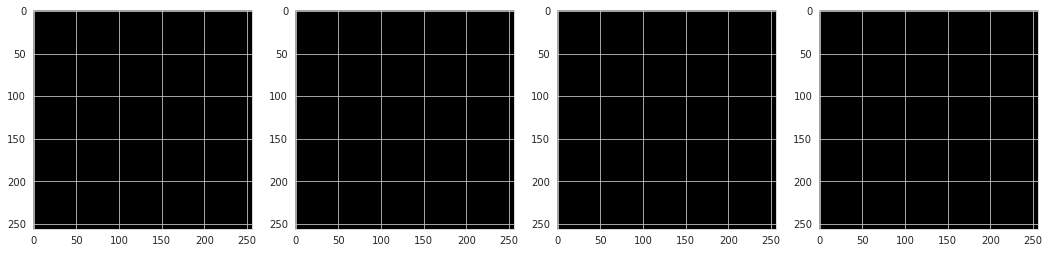

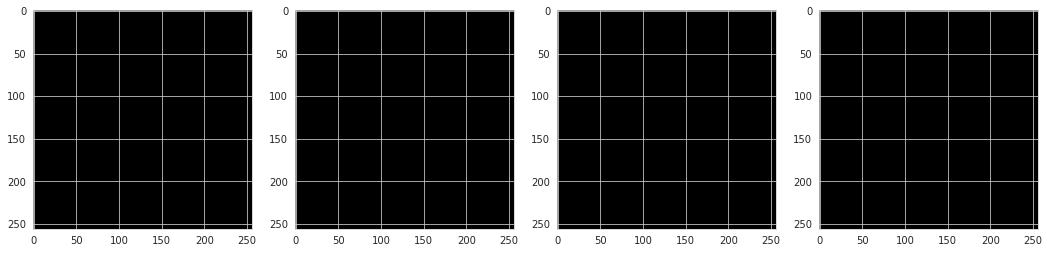

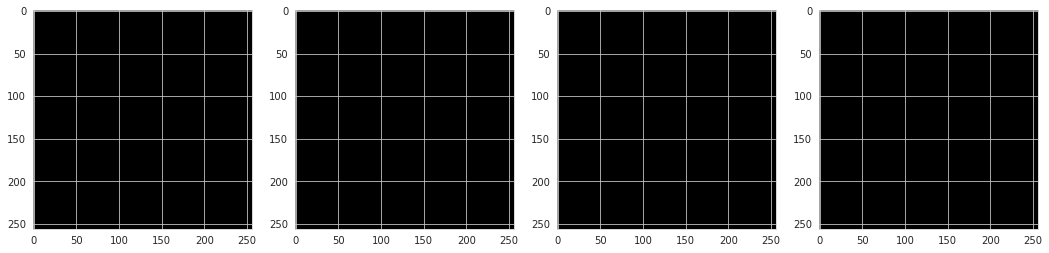

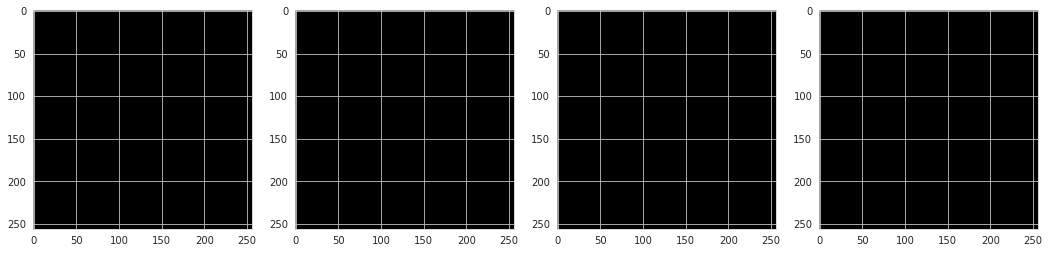

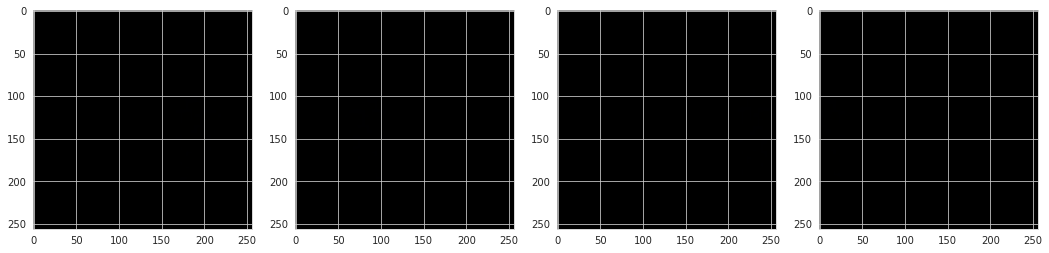

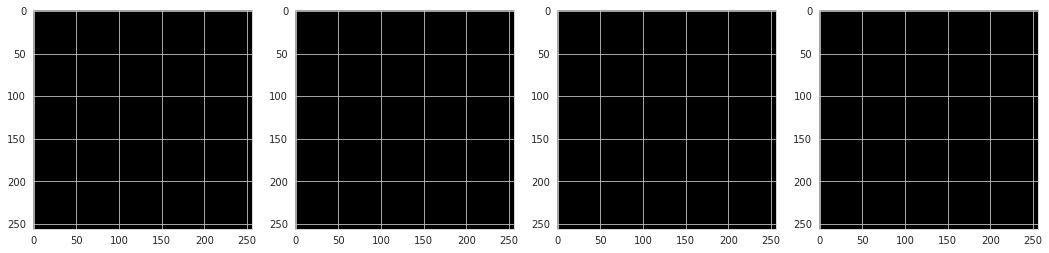

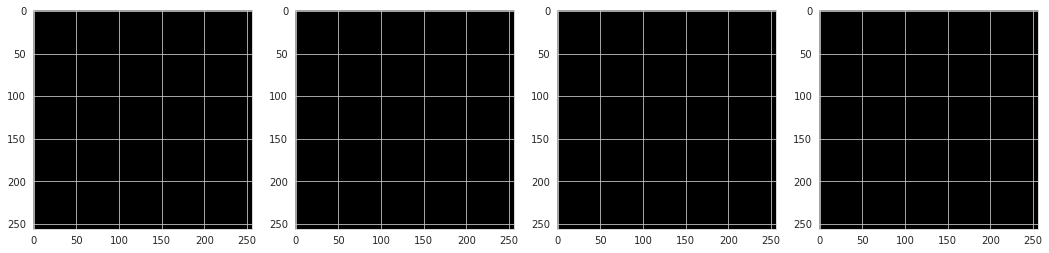

In [ ]:
imageAugmentor()

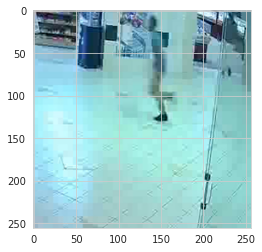

In [ ]:
pic_index += 8
next_pic = [
    os.path.join(human, fname) for fname in os.listdir("/content/human detection dataset/1")[pic_index - 8:pic_index]
]
image = plt.imread(next_pic[0])
# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
imshow(images[0])
show()

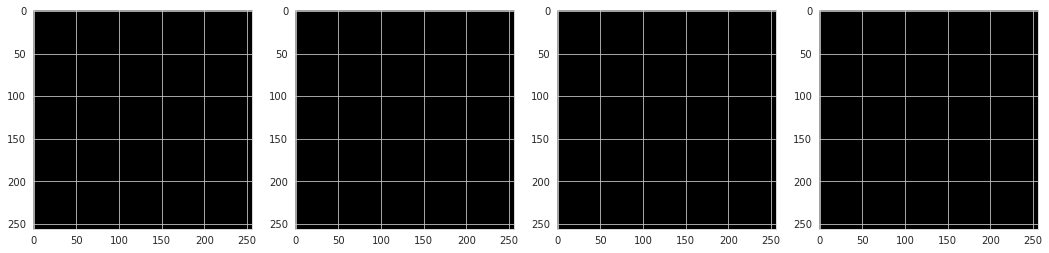

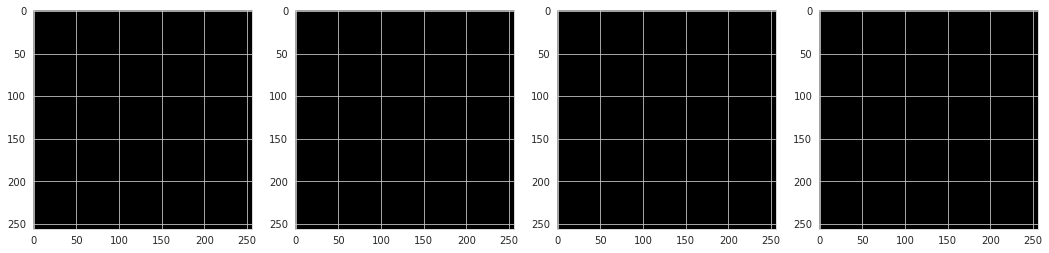

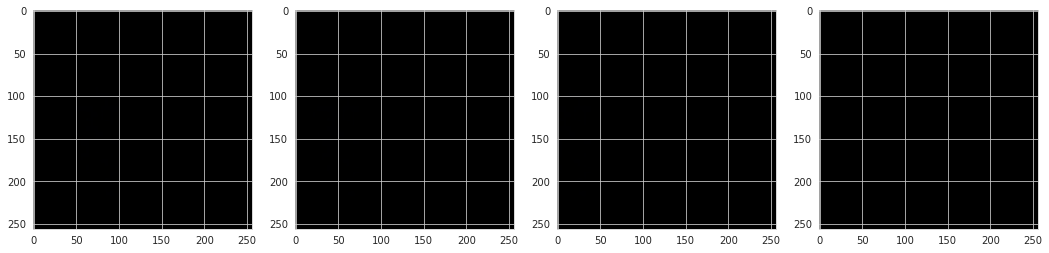

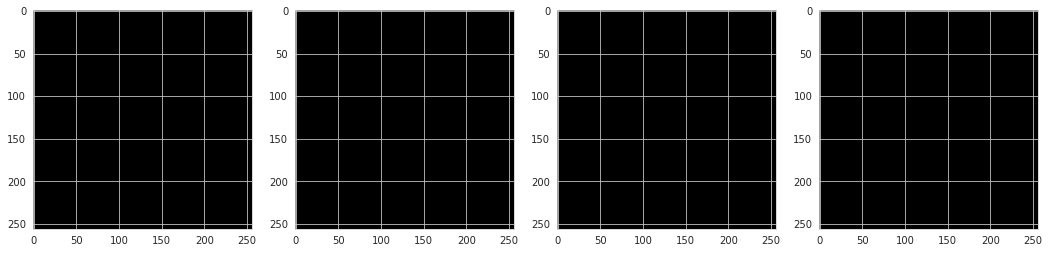

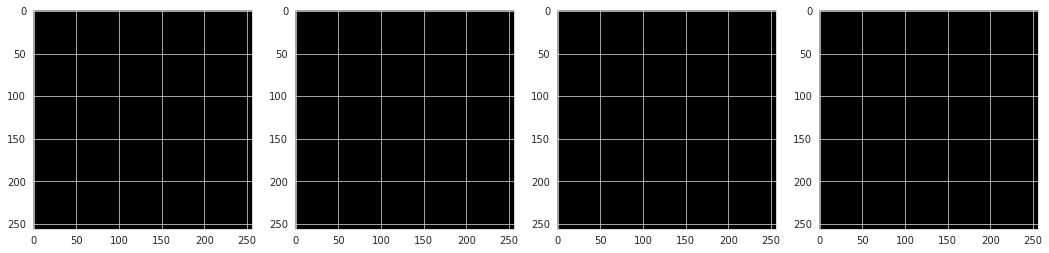

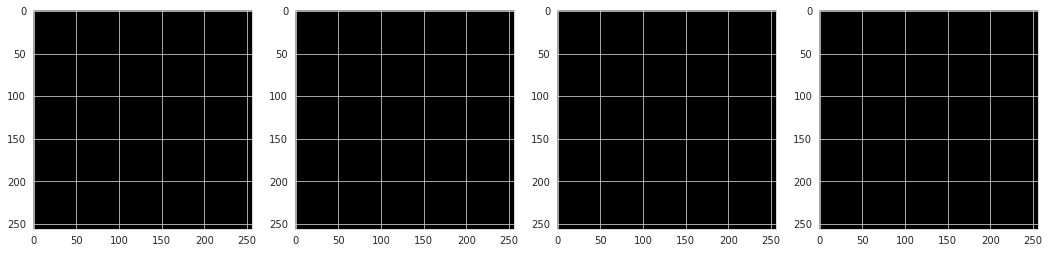

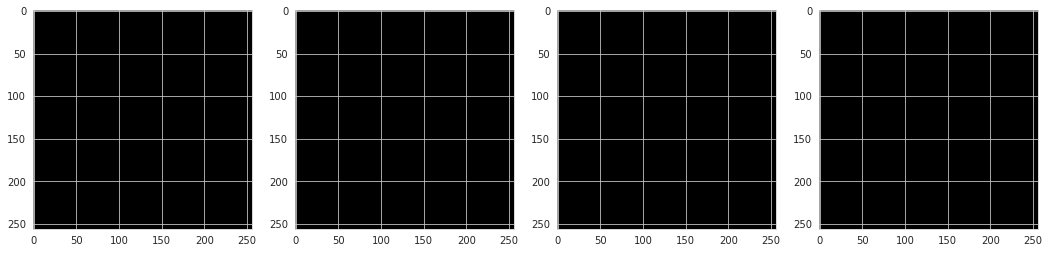

In [ ]:
imageAugmentor()

- data cogaltma kismina bak.

In [ ]:
tf.random.set_seed(42)
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# model2.add(Dropout(0.3))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
'''tf.random.set_seed(42)
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) # hiden layer ekledik
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])'''

In [ ]:
'''model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])'''

In [ ]:
model2.summary()

NameError: ignored

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)

In [ ]:
model2.fit(train_image_gen,
          epochs=32, # epochda artti burda 
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

In [ ]:
model2.metrics_names

In [ ]:
summary = pd.DataFrame(model2.history.history)
summary

In [ ]:
summary[["loss", "accuracy"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(42)
model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.3))

model3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.3))

model3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) # hiden layer ekledik
model3.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.3))

model3.add(Flatten())


model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(64))
model3.add(Activation('relu'))

model3.add(Dense(32))
model3.add(Activation('relu'))


model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MOdel3 Batchli olan

In [ ]:

from tensorflow.keras.layers import BatchNormalization

In [ ]:
'''model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(BatchNormalization())

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.3))

model3.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# model3.add(BatchNormalization())
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# model3.add(BatchNormalization())
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.3))

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.3))


model3.add(Flatten())


model3.add(Dense(128))
model3.add(Activation('relu'))
# model3.add(Dropout(0.3))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['val_accuracy'])'''

In [ ]:
model3.summary()

In [ ]:
model3.fit(train_image_gen, 
          batch_size=32, 
          epochs=8,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

In [ ]:
summary = pd.DataFrame(model3.history.history)
summary

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

Model4

In [ ]:
model4 = Sequential()

model4.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())

model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))


model4.add(Flatten())


model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dropout(0.3))

model4.add(Dense(1))
model4.add(Activation('sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model4.summary()

In [ ]:
model4.fit(train_image_gen, 
          batch_size=32, 
          epochs=8,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

In [ ]:
 y test koy dene burda  val image gen 

In [ ]:
#huseyin hoca gec kaldi 6 demistik hab]lbuki 

evaluation

In [ ]:
score = model3.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
pred_prob = model3.predict(val_image_gen)

In [ ]:
y_pred = pred_prob > 0.5

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

# Prediction

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model3.save("model3_model.h5")

In [ ]:
model=load_model("model3_model.h5")

In [ ]:
target_class=random.choice(class_names)
target_class

In [ ]:
random_image = random.sample(os.listdir(val_path + target_class), 1)
random_image

In [ ]:
image_path = val_path + target_class + "/" + random_image[0]
image_path

In [ ]:
my_image = image.load_img(image_path, target_size=image_shape)

In [ ]:
my_image

In [ ]:
type(my_image)

In [ ]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [ ]:
my_image.shape

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

In [ ]:
model.predict(my_image)

In [ ]:
train_image_gen.class_indices

In [ ]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(test_path + target_class), 1)
  img_path = test_path + target_class + "/" + random_image[0]
  img = image.load_img(img_path, target_size=img_size)
  img = np.array(img)
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# pred_and_plot(model, (130, 130))

# Referace

https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>